In [8]:
#%%
import numpy as np
import sys
sys.path.append(r"C:\Users\alasm\Masteroppgave\w3tp")
import w3t
#import os
import h5py
from matplotlib import pyplot as plt
import time
import os
import pandas as pd

 
tic = time.perf_counter()
plt.close("all")

In [9]:
section_height = 3.33/100
section_width =  18.3/100
section_length_1 = 2.68
section_length_2 = 2.66

In [10]:
def load_and_process_AD(h5_input_path, section_name, file_names, filter_order = 6, filter_cutoff_frequency = 2, mode="decks", upwind_in_rig=True):
    """Gather, filter, calculate and plot static coeff for."""
 
    h5_file = os.path.join(h5_input_path, section_name)
    f = h5py.File((h5_file + ".hdf5"), "r")
 
    exp0 = w3t.Experiment.fromWTT(f[file_names[0]])
    exp1 = w3t.Experiment.fromWTT(f[file_names[1]])
 
    exp0.filt_forces(filter_order, filter_cutoff_frequency)
    exp1.filt_forces(filter_order, filter_cutoff_frequency)

    if upwind_in_rig == True:
        static_coeff = w3t.StaticCoeff.fromWTT(exp0,exp1,section_width,section_height,section_length_1, section_length_2, upwind_in_rig=True)
    elif upwind_in_rig == False:
        static_coeff = w3t.StaticCoeff.fromWTT(exp0,exp1,section_width,section_height,section_length_1, section_length_2, upwind_in_rig=False)
    
    #static_coeff.plot_drag_mean(mode=mode)
    #static_coeff.plot_lift_mean(mode=mode)
    #static_coeff.plot_pitch_mean(mode=mode)

    #static_coeff.plot_drag(mode=mode)
    #static_coeff.plot_lift(mode=mode)
    #static_coeff.plot_pitch(mode=mode)
    
    plt.show()
    return exp0,exp1,static_coeff

In [12]:
section_name = "Single_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments
h5_file = os.path.join(h5_input_path, section_name)
f = h5py.File((h5_file + ".hdf5"), "r")

data_set_groups = list(f)
print(data_set_groups)

['HAR_INT_SINGLE_03_01_000', 'HAR_INT_SINGLE_03_01_001', 'HAR_INT_SINGLE_03_01_002', 'HAR_INT_SINGLE_03_02_000', 'HAR_INT_SINGLE_03_02_001', 'HAR_INT_SINGLE_03_02_002', 'HAR_INT_SINGLE_04_01_002', 'HAR_INT_SINGLE_04_01_003', 'HAR_INT_SINGLE_04_01_004', 'HAR_INT_SINGLE_04_01_005', 'HAR_INT_SINGLE_04_02_000', 'HAR_INT_SINGLE_04_02_001', 'HAR_INT_SINGLE_04_02_002', 'HAR_INT_SINGLE_04_02_003']


Motion type: 2
Motion type: 2
Motion type: 2
Motion type: 2
Motion type: 2
Motion type: 2


C:\Users\alasm\Masteroppgave\w3tp\w3t\_exp.py:583: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


Motion type: 2
Motion type: 2
Motion type: 2
Motion type: 2
Motion type: 2
Motion type: 2
Motion type: 1
Motion type: 1
Motion type: 1
Motion type: 1
Motion type: 1
Motion type: 1
Motion type: 1
Motion type: 1
Motion type: 1
Motion type: 1
Motion type: 1
Motion type: 1
Motion type: 1
Motion type: 1
Motion type: 1
Motion type: 1
Motion type: 1
Motion type: 1
3
Experiment 10
2
Motion type: 2
Motion type: 2
Motion type: 2
Motion type: 2
Motion type: 2
Motion type: 2
Experiment 10
2
Motion type: 2
Motion type: 2
Motion type: 2
Motion type: 2
Motion type: 2
Motion type: 2
Experiment 10
2
Motion type: 2
Motion type: 2
Motion type: 2
Motion type: 2
Motion type: 2
Motion type: 2
4


IndexError: list index out of range

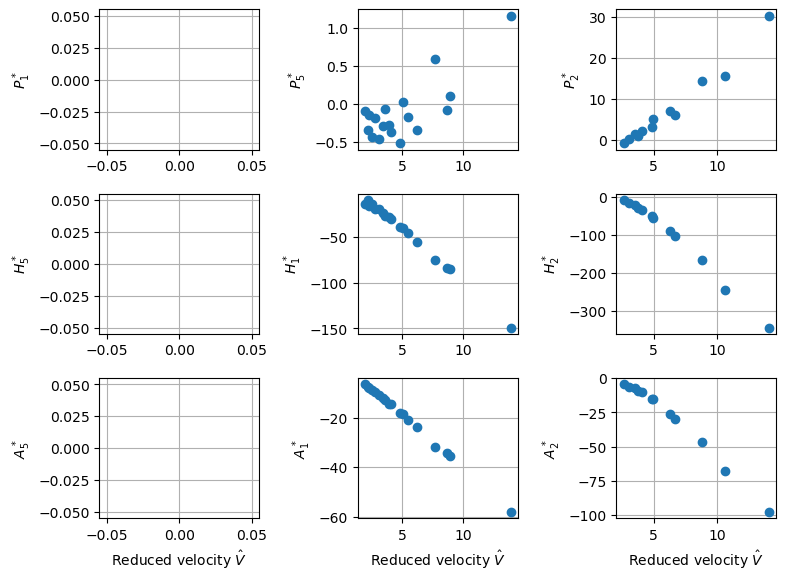

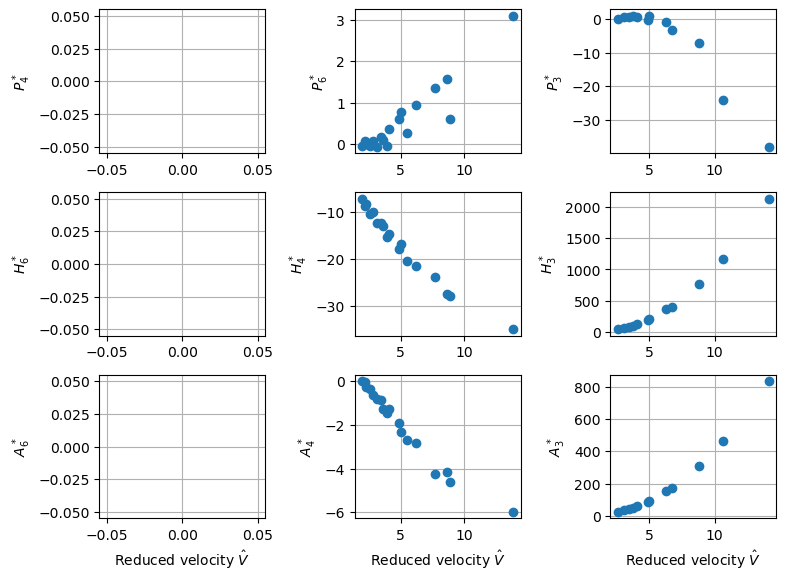

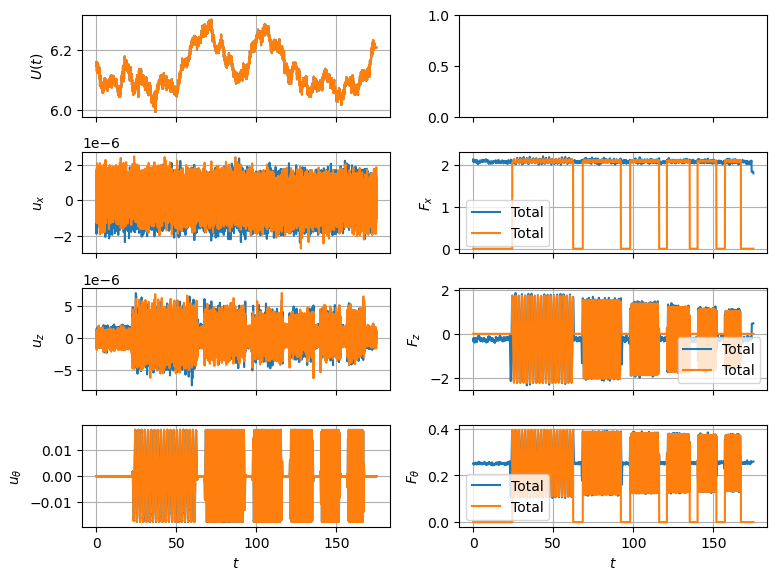

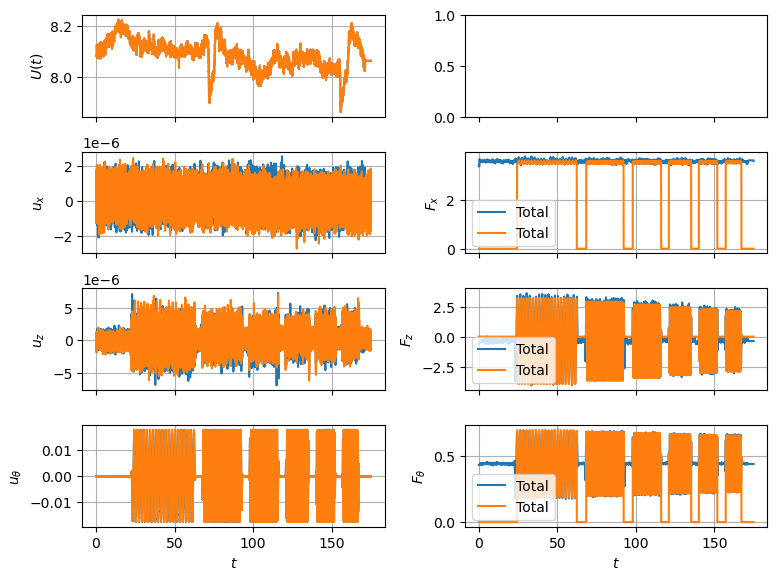

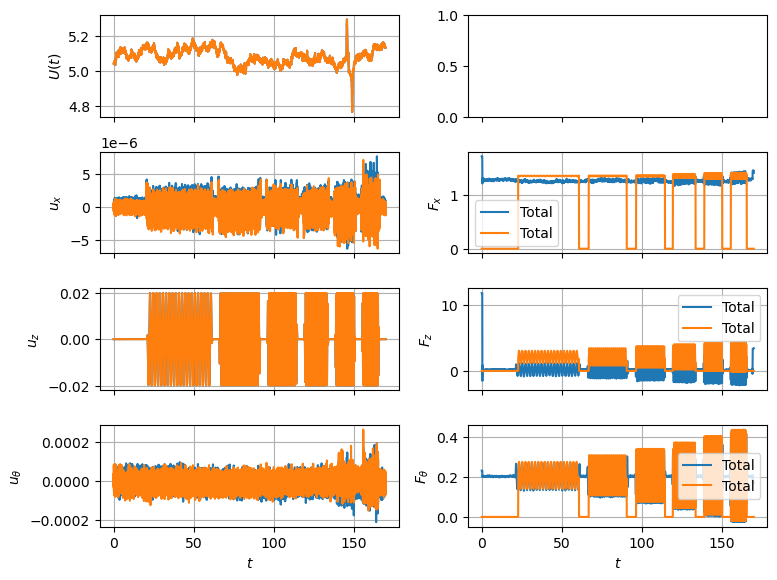

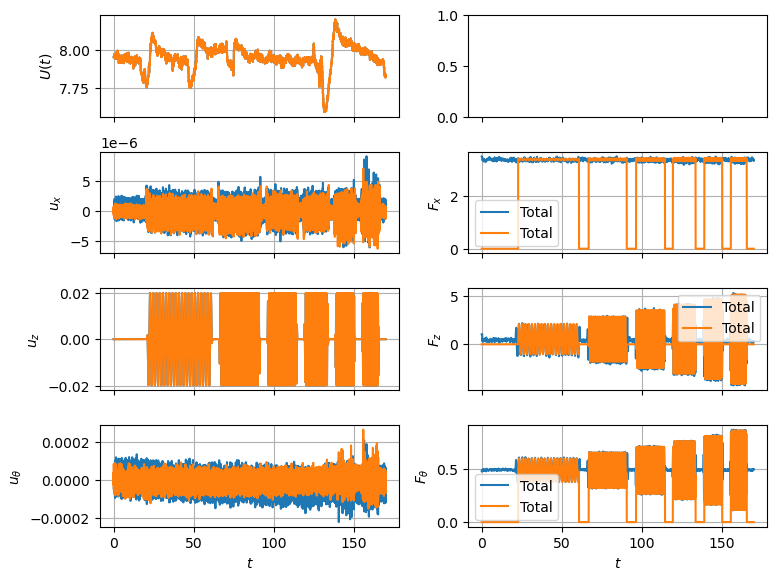

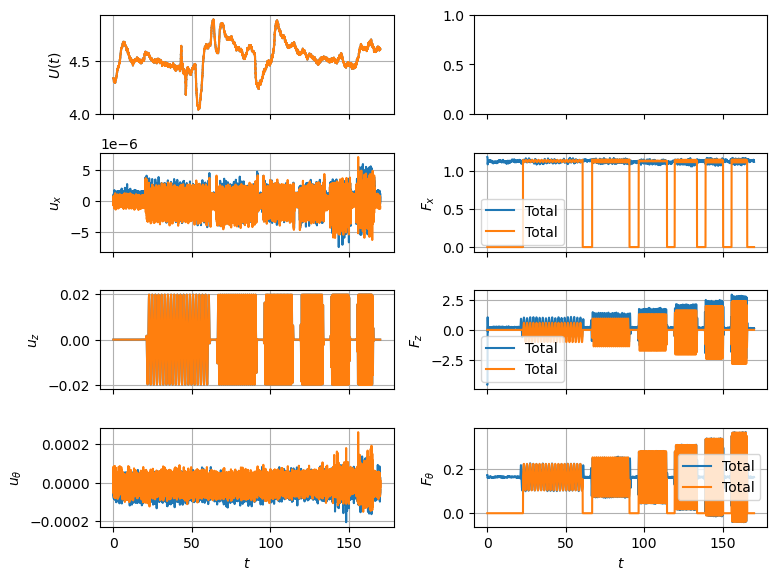

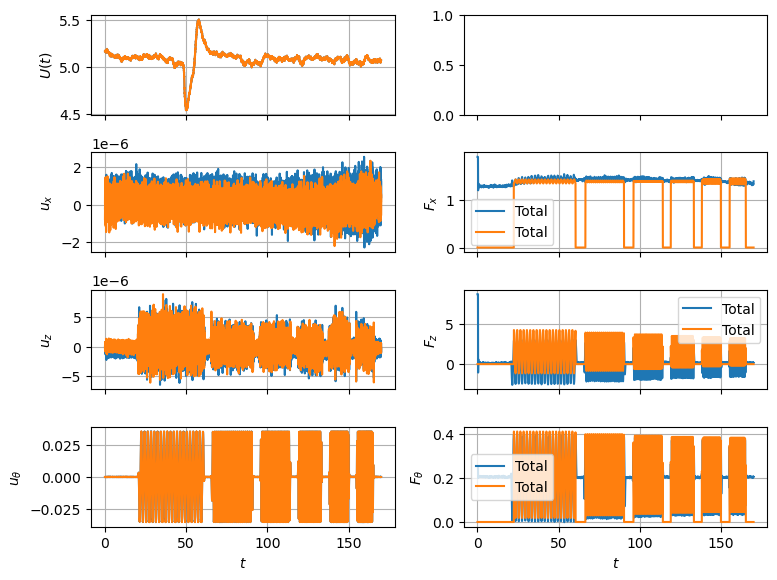

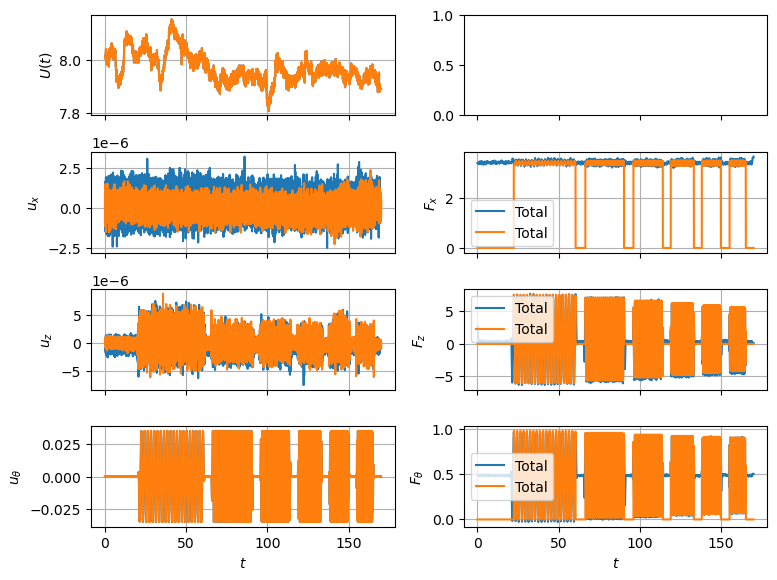

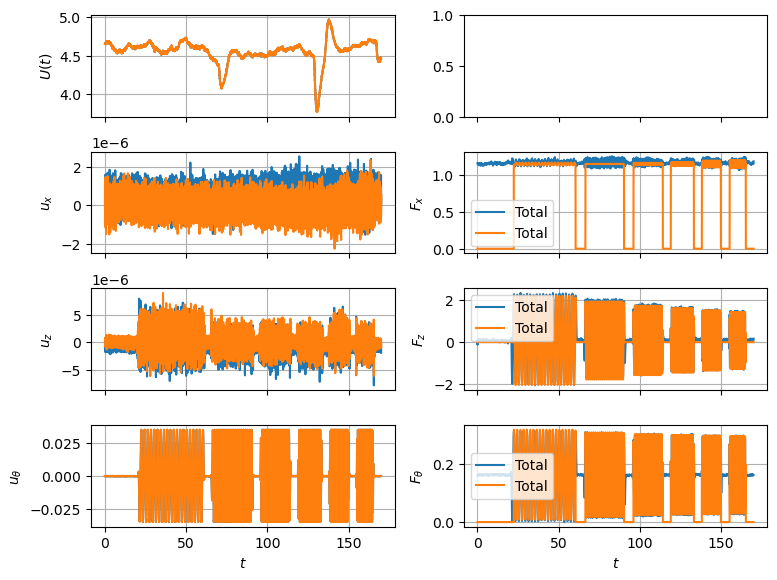

In [ ]:
section_name = "Single_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments
h5_file = os.path.join(h5_input_path, section_name)
f = h5py.File((h5_file + ".hdf5"), "r")

data_set_groups = list(f)
print(data_set_groups)
exps = np.array([])
for data_set_group in data_set_groups:
    exps = np.append(exps,w3t.Experiment.fromWTT(f[data_set_group]))
tests_with_equal_motion = w3t.group_motions(exps)

#%% Obtain aerodynamic derivatives

ads_list = []
val_list = []
expf_list = []

fig_damping, _ = plt.subplots(3,3)
fig_stiffness, _ = plt.subplots(3,3)



all_ads = w3t.AerodynamicDerivatives()
for k1 in [1,2]:
    for k2 in range(len(tests_with_equal_motion[k1])-1):
        exp0 = exps[tests_with_equal_motion[k1][0]]
        exp1 = exps[tests_with_equal_motion[k1][k2+1]]
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        
        ads, val, expf = w3t.AerodynamicDerivatives.fromWTT(exp0,exp1,section_width,section_length)
        ads_list.append(ads)
        val_list.append(val)
        expf_list.append(expf)
        all_ads.append(ads)   
        
        # plot measurements and predictions by ads
        fig, _ = plt.subplots(4,2,sharex=True)
        expf.plot_experiment(fig=fig)
        val.plot_experiment(fig=fig)
all_ads.plot(fig_damping = fig_damping, fig_stiffness=fig_stiffness)

#%%
all_ads = w3t.AerodynamicDerivatives()
for k1 in [3,4]:
    print(k1)
    for k2 in range(len(tests_with_equal_motion[k1])-1):
        exp0 = exps[tests_with_equal_motion[k1][0]]
        exp1 = exps[tests_with_equal_motion[k1][k2+1]]
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)

        print("Experiment " + str(tests_with_equal_motion[k1][0]))
        print(exp0.motion_type())
        
        ads, val, expf = w3t.AerodynamicDerivatives.fromWTT(exp0,exp1,section_width,section_length)
        ads_list.append(ads)
        val_list.append(val)
        expf_list.append(expf)
        all_ads.append(ads)   
        
        # plot measurements and predictions by ads
        fig, _ = plt.subplots(4,2,sharex=True)
        expf.plot_experiment(fig=fig)
        val.plot_experiment(fig=fig)
all_ads.plot(fig_damping = fig_damping, fig_stiffness=fig_stiffness)
#%%
all_ads = w3t.AerodynamicDerivatives()
for k1 in [5,6]:
    print(k1)
    for k2 in range(len(tests_with_equal_motion[k1])-1):
        exp0 = exps[tests_with_equal_motion[k1][0]]
        exp1 = exps[tests_with_equal_motion[k1][k2+1]]
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)

        print("Experiment " + str(tests_with_equal_motion[k1][0]))
        print(exp0.motion_type())
        
        ads, val, expf = w3t.AerodynamicDerivatives.fromWTT(exp0,exp1,section_width,section_length)
        ads_list.append(ads)
        val_list.append(val)
        expf_list.append(expf)
        all_ads.append(ads)   
        
        # plot measurements and predictions by ads
        fig, _ = plt.subplots(4,2,sharex=True)
        expf.plot_experiment(fig=fig)
        val.plot_experiment(fig=fig)
all_ads.plot(fig_damping = fig_damping, fig_stiffness=fig_stiffness)


plt.show()
    
    
#%% Plot aerodynamic derivatives